# Multiple Linear Regression

Multiple Linear Regression: An Overview

Multiple Linear Regression (MLR), also known as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of MLR is to model the linear relationship between the explanatory (independent) variables and a single response (dependent) variable.

How Multiple Linear Regression Works

MLR fits a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. The MLR equation is generally written as:

￼

Here:

	•	￼ is the dependent variable.
	•	￼ are the independent variables.
	•	￼ are the parameters of the model.
	•	￼ is the error term, which is the part of ￼ the regression model is unable to explain.

Assumptions of Multiple Linear Regression

MLR assumes that:

	1.	Linearity: There is a linear relationship between the dependent variables and the independent variables.
	2.	No Multicollinearity: The independent variables are not too highly correlated with each other.
	3.	Homoscedasticity: This assumption states that the variance of error terms are similar across the values of the independent variables.
	4.	Independence: Observations are independent of each other.
	5.	Normal Distribution of Errors: The error terms are normally distributed.

Estimation Techniques

The most common method for fitting a multiple linear regression model is the Ordinary Least Squares (OLS) method. OLS estimates the parameters by minimizing the sum of the squared differences between observed and predicted values.

Evaluating the Model

The goodness of fit in an MLR model is often determined by:

	•	R-squared: This statistic measures the proportion of variance in the dependent variable that can be explained by the independent variables.
	•	Adjusted R-squared: This is a modified version of R-squared adjusted for the number of predictors in the model.
	•	F-statistic: Used to determine if the model as a whole has a statistically significant predictive capability.
	•	t-tests: Used to determine if individual coefficients are significantly different from zero.

Practical Considerations

	•	Scaling and Transformations: Features may need to be scaled or transformed to meet model assumptions.
	•	Outlier Detection: Outliers can have a disproportionately large effect on the regression model and may need to be removed.
	•	Diagnostics: Checking for multicollinearity, homoscedasticity, and influential observations is crucial for a reliable model.

Applications

Multiple linear regression is widely used across many fields such as economics, business, engineering, the social sciences, and biology. Examples include:

	•	Predicting consumer spending using income and wealth levels.
	•	Forecasting stock prices based on various economic indicators.
	•	Estimating the effects of marketing campaigns on sales.

Limitations

	•	Non-linear Relationships: MLR cannot adequately model non-linear relationships without transformation of variables.
	•	Causality: MLR cannot be used to establish causal relationships. It can only suggest associations.
	•	Quality of Data: The accuracy of a regression model is highly dependent on the quality of the data used.

In conclusion, multiple linear regression is a powerful statistical tool for analyzing relationships between multiple variables. However, careful attention must be paid to the assumptions the model is based on and the quality of the data to ensure reliable and meaningful results.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

class MultipleLinearRegression:

    def __init__(self, learning_rate=0.001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Example of using the class with a dataset that has multiple features
X, y = datasets.make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

regressor = MultipleLinearRegression(learning_rate=0.01, n_iterations=2000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

# Visualization (in 3D if possible, otherwise show evaluation metrics)
# Since it's hard to visualize multiple dimensions in a simple 2D plot, we focus on evaluation.


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 113.90594517447205


In [8]:
import plotly.express as px
fig = px.scatter_3d(x=X_test[:, 0], y=X_test[:, 1], z=predictions, color=y_test, title='3D Scatter Plot of Predictions')
fig.update_layout(scene=dict(
                    xaxis_title='Feature 1',
                    yaxis_title='Feature 2',
                    zaxis_title='Predicted Values'))
fig.show()

In [9]:
def r2_score(y_true, y_pred):
    numerator = np.sum((y_true - y_pred) ** 2)
    denominator = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (numerator / denominator)

r2_value = r2_score(y_test, predictions)
print("R2:", r2_value)

R2: 0.9883395048070226


In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

rmse_value = rmse(y_test, predictions)
print("RMSE:", rmse_value)

RMSE: 10.672672822422323


In [11]:
def adjusted_r2(y_true, y_pred, n, p):
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))  

adjusted_r2_value = adjusted_r2(y_test, predictions, X_test.shape[0], X_test.shape[1])
print("Adjusted R2:", adjusted_r2_value)

Adjusted R2: 0.9861531619583394


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming data X and y are already defined as numpy arrays in the user's notebook
# We use the same dataset and splits as provided in the original code

# Example dataset
np.random.seed(42)
X, y = np.random.randn(100, 3), np.random.randn(100)  # Simulated data

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Initializing and training the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, r2

(np.float64(0.9456038173948219), -0.017759397658854148)

# Polynomial Regression

Polynomial Regression: An Overview

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable ￼ and the dependent variable ￼ is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of ￼ and the corresponding conditional mean of ￼, denoted ￼. Although polynomial regression fits a nonlinear model to the data, it is considered a special case of multiple linear regression because the regression function ￼ is linear in the unknown parameters that are estimated from the data.

How Polynomial Regression Works

In polynomial regression, the data is fit using a polynomial equation, which can provide a good approximation to the relationship between the variables. The general polynomial regression model is expressed as:

￼

Here:

	•	￼ is the dependent variable.
	•	￼ is the independent variable.
	•	￼ are the coefficients of the model.
	•	￼ is the degree of the polynomial.
	•	￼ is the error term, capturing the discrepancy between the observed values and the values predicted by the model.

Assumptions of Polynomial Regression

While polynomial regression can model nonlinear relationships, it still assumes:

	1.	Linearity in Parameters: The regression function is linear in the parameters even though it can handle non-linear relationships between variables.
	2.	Independence of Errors: The errors in the regression model are assumed to be independent.
	3.	Homoscedasticity: The variance of the error terms is constant across all levels of the independent variables.
	4.	Normal Distribution of Errors: For inference using the least squares estimates, the error terms are assumed to be normally distributed.

Fitting the Model

Polynomial regression can be fit using the method of least squares, where the objective is to minimize the sum of the squared residuals (the differences between observed and predicted values). Polynomial features of the independent variables are created (e.g., ￼) and then used in a multiple linear regression model.

Advantages of Polynomial Regression

	•	Flexibility: Polynomial regression can fit a wide range of curvature in the data, making it very flexible for modeling more complex patterns.
	•	Ease of Use: Like linear regression, polynomial regression models can be easily implemented and interpreted using standard statistical software.

Disadvantages and Considerations

	•	Overfitting: Higher-degree polynomials can lead to overfitting, where the model learns the training data too well, including the noise, resulting in poor generalization to new data.
	•	Choice of Degree: Selecting the right degree for the polynomial is crucial. Too low a degree can lead to underfitting, while too high a degree can lead to overfitting.
	•	Computational Complexity: As the degree of the polynomial increases, so does the complexity of the model, which can lead to increased computational costs.

Applications

Polynomial regression is used in various applications such as:

	•	Economics: For modeling economic growth patterns or the distribution of income.
	•	Science and Engineering: In fields where the relationship between variables is inherently non-linear.
	•	Business Analytics: For sales forecasting and risk management where trends often follow non-linear patterns.

Conclusion

Polynomial regression is a useful technique for modeling relationships between variables where the relationship is not linear. However, care must be taken to avoid overfitting and to select an appropriate degree of the polynomial based on the data and the domain knowledge. Regularization techniques and cross-validation can also be useful tools in polynomial regression to help prevent overfitting and select the optimal model.

Mean Squared Error: 1.287871497731052
R2 Score: 0.8185585705771123
Coefficients: [[0.         1.48295775 0.46212333]]
Coefficients: [1.99341348]


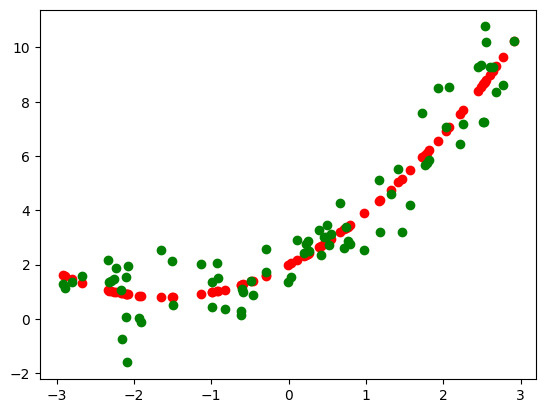

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)
# quadratic equation used 0.5x^2 + 1.5x + 2 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

# Implement Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train, y_train)

from sklearn.preprocessing import PolynomialFeatures

ploy = PolynomialFeatures(degree = 2, include_bias=True)
X_poly = ploy.fit_transform(X_train)
X_poly_test = ploy.transform(X_test)

from sklearn.metrics import mean_squared_error, r2_score
regression.fit(X_poly, y_train)
y_pred = regression.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

print('Coefficients:', regression.coef_)

print('Coefficients:', regression.intercept_)

plt.scatter(X_train, regression.predict(X_poly), color = 'r')
plt.scatter(X_train, y_train, color = 'g')

Mean Squared Error: 1.0667500209695837


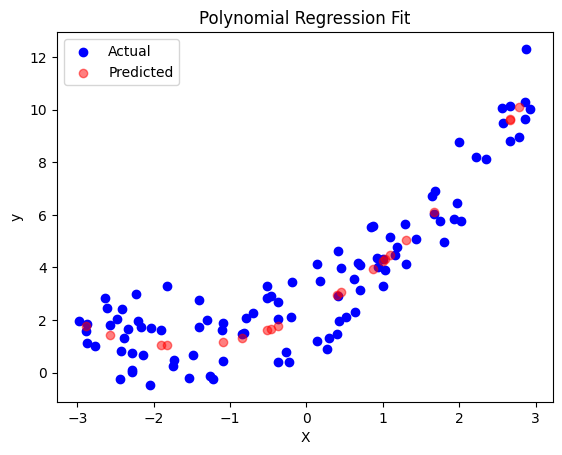

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

# Function to create polynomial features
def create_polynomial_features(X, degree):
    n = X.shape[0]
    X_poly = np.ones((n, 1))  # start with a column of ones for the intercept
    for i in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X**i))
    return X_poly

# Creating polynomial features
X_poly = create_polynomial_features(X, 2)

# Splitting the data into training and testing sets
np.random.seed(22)
indices = np.random.permutation(X_poly.shape[0])
train_idx, test_idx = indices[:80], indices[80:]
X_train, X_test = X_poly[train_idx], X_poly[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Linear regression using the normal equation
def normal_equation(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

# Training the model
theta = normal_equation(X_train, y_train)

# Prediction function
def predict(X, theta):
    return X.dot(theta)

# Predicting values
y_pred = predict(X_test, theta)

# Calculating Mean Squared Error
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Visualizing the results
plt.scatter(X[:, 0], y, color='blue', label='Actual')
plt.scatter(X_test[:, 1], y_pred, color='red', label='Predicted', alpha=0.5)
plt.title('Polynomial Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Logistic Regression

Logistic Regression: An Overview

Logistic Regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model; it is a form of binomial regression.

How Logistic Regression Works

Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes.

Binary Logistic Regression

The most common form of logistic regression is binary logistic regression, which is used when the dependent variable is binary (0 or 1; true or false; yes or no). The goal is to find the best-fitting model to describe the relationship between the dependent variable and a set of independent variables.

Mathematical Model

The probability of the default class (usually “1”) can be calculated using the sigmoid function:

￼

Here:

	•	￼ is the probability of the dependent variable equaling a “1”.
	•	￼ are the regression coefficients.
	•	￼ are the feature values.

Decision Boundary

Logistic regression creates a decision boundary to classify the observations. For instance, in binary classification, a common threshold value is 0.5. Observations with a probability higher than 0.5 are classified as 1, and those less than 0.5 as 0.

Multiclass Logistic Regression

Logistic regression can be extended to handle multiple classes through techniques such as:

	•	One-vs-Rest (OvR): Where a separate model is built for each class to distinguish it from all other classes.
	•	Multinomial Logistic Regression: Where the logistic function is replaced with a softmax function to predict multiple classes directly without having to combine binary classifiers.

Estimation Techniques

Parameters of the logistic regression model are typically estimated using maximum likelihood estimation (MLE), which seeks to find the parameter values that maximize the likelihood of the observed sample.

Key Features

	•	Interpretability: Logistic regression coefficients represent the logarithm of the odds of the event happening, which can be exponentiated to obtain odds ratios.
	•	Modeling Probabilities: Unlike many other classification models, logistic regression estimates the probabilities of classifications.
	•	Feature Importance: Coefficients of variables give insights into their importance to the output variable, with positive coefficients increasing log-odds of the positive class and negative coefficients decreasing it.

Applications

Logistic regression is widely used in various fields including medical fields and social sciences, for instance:

	•	Predicting whether a patient has a disease or not, based on observed characteristics of the patient (age, body mass index, etc.).
	•	An election outcome as a function of demographic characteristics.

Limitations

	•	Assumption of Linearity: Logistic regression assumes linearity of independent variables and log odds. Although this might be a strong assumption, it makes the model easy to interpret.
	•	Sensitive to Imbalance: Like many other classifiers, logistic regression might perform poorly with unbalanced datasets.
	•	Overfitting and Underfitting: Logistic regression can overfit on datasets with many features and underfit on datasets with fewer samples.

To improve the performance of logistic regression, feature engineering, choosing effective regularization techniques, and using ensemble methods can be considered. These enhancements help in making the model robust to overfitting and more generalizable to unseen data.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=22)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Model training 
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

y_pred = logistic.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)

0.99
[[140   2]
 [  1 157]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.99      0.99      0.99       158

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generating synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient descent for logistic regression
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        weights -= lr * dw
        bias -= lr * db
        
    return weights, bias

# Training the model
weights, bias = train_logistic_regression(X_train, y_train)

# Prediction function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in y_pred]

# Making predictions
y_pred = predict(X_test, weights, bias)

# Evaluating the model
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

acc = accuracy(y_test, y_pred)
print('Accuracy:', acc)

# Simple function to calculate confusion matrix
def confusion_matrix(y_true, y_pred):
    cm = np.zeros((2, 2))
    for t, p in zip(y_true, y_pred):
        cm[t][p] += 1
    return cm

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Accuracy: 0.99
Confusion Matrix:
 [[141.   1.]
 [  2. 156.]]


# Gradient Descent

Gradient Descent: An Overview

Gradient Descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. It’s commonly used in machine learning and deep learning for minimizing a cost function, which quantifies the error or loss of a model relative to its performance on the training data.

How Gradient Descent Works

The fundamental principle behind gradient descent is to update the parameters of the model in the direction that minimally decreases the cost function. The steps involved are typically:

	1.	Initialization: Start with random values for the parameters of the model (weights and biases in the case of a neural network).
	2.	Compute Gradient: Calculate the gradient of the cost function with respect to each parameter. The gradient is a vector that contains the partial derivatives of the cost function relative to each parameter.
	3.	Update Parameters: Adjust the parameters in the direction that reduces the cost function. This is done by subtracting a fraction of the gradient from the current parameter values. The size of this step is determined by the learning rate, a hyperparameter that you must choose ahead of time.
	4.	Repeat: Repeat the process until the cost function converges to a minimum value, the parameters stabilize, or a set number of iterations is reached.

Mathematical Representation

For a function ￼, where ￼ represents the parameters of the model, the update rule for each iteration of gradient descent is:

￼

Here:

	•	￼ are the parameters at the current step.
	•	￼ is the learning rate.
	•	￼ is the gradient of the function at ￼.

Variants of Gradient Descent

	1.	Batch Gradient Descent: Computes the gradient using the whole dataset. This method is precise but can be very slow and computationally expensive with large datasets.
	2.	Stochastic Gradient Descent (SGD): Computes the gradient using a single sample at each iteration. This variant is much faster and can navigate out of local minima effectively but may introduce a lot of variance in the parameter updates.
	3.	Mini-batch Gradient Descent: Strikes a balance between batch and stochastic versions by computing the gradient against a subset of the data. This is the most commonly used variant in practice due to its efficiency and convergence stability.

Key Challenges

	•	Choosing a Proper Learning Rate: If the learning rate is too high, the algorithm might overshoot the minimum. If it’s too low, convergence becomes slower, potentially stalling the algorithm if it hits a plateau or gets stuck in a local minimum.
	•	Convergence Issues: Especially with non-convex functions, finding the global minimum is not guaranteed, and the algorithm might settle at a suboptimal local minimum or a saddle point.
	•	Scaling and Feature Normalization: Gradient descent is sensitive to the scale of the features, so appropriate scaling or normalization is typically required to ensure stable and fast convergence.

Applications

Gradient descent is foundational in training various types of machine learning models, including linear regression, logistic regression, and neural networks. Its flexibility and simplicity make it suitable for a wide range of problems across optimization and data fitting in many scientific and engineering disciplines.

By carefully tuning the learning rate and choosing the right variant for the task, gradient descent can be a powerful tool for optimizing complex models efficiently.

In [19]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance of SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SGDRegressor model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)

# Fit the model using the training data
sgd_reg.fit(X_train_scaled, y_train)

# Predict using the test data
y_pred = sgd_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.01289836813191519


In [20]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshape y to make it a column vector

# Add intercept term
X = np.c_[np.ones((X.shape[0], 1)), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train[:, 1:] = scaler.fit_transform(X_train[:, 1:])
X_test[:, 1:] = scaler.transform(X_test[:, 1:])

# Gradient Descent settings
learning_rate = 0.01
n_iterations = 1000
m = X_train.shape[0]

# Initialize theta (weights)
theta = np.random.randn(X_train.shape[1], 1)

# Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
    theta -= learning_rate * gradients

# Predict
y_pred = X_test.dot(theta)

# Calculate MSE
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.01142753756217735
